### GEOPANDAS

**Geopandas** jest projektem pozwalającym na wprowadzenie obiektów gegraficznych wraz z ich geometrią jako obiekty pandas



[Przewodnik] (http://geopandas.org/index.html)

In [90]:

%matplotlib inline
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt


In [4]:
kraje=gpd.read_file('Kraje.shp')

In [19]:
kraje.head()

,OBJECTID,NAME,GMI_CNTRY,REGION,Shape_Leng,Shape_Area,geometry
0,1,Afghanistan,AFG,Asia,51.506628,62.572979,"POLYGON ((65.62729644775396 37.33319854736328,..."
1,2,Albania,ALB,Europe,10.047658,3.084494,"POLYGON ((19.39731979370129 42.31707000732433,..."
2,3,Algeria,DZA,NorthAfrica,70.955460,213.570609,POLYGON ((-1.253888964653015 32.21471023559582...
3,4,Andorra,AND,Europe,0.916993,0.051535,"POLYGON ((1.710966944694633 42.47349929809576,..."
4,5,Angola,AGO,Sub Saharan Africa,59.298638,103.852308,(POLYGON ((12.01006984710688 -5.02061510086059...


[Palety kolorów] (https://matplotlib.org/users/colormaps.html)

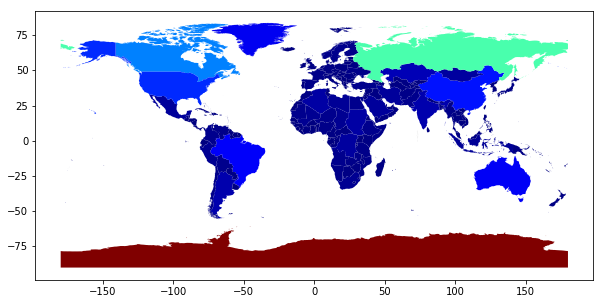

In [24]:
kraje.plot(figsize=(10,5),column='Shape_Area',cmap='jet');

In [34]:
europa=kraje[(kraje['REGION']=='Europe') & (kraje['NAME']!='Russia')]

In [36]:
europa.head()

,OBJECTID,NAME,GMI_CNTRY,REGION,Shape_Leng,Shape_Area,geometry
1,2,Albania,ALB,Europe,10.047658,3.084494,"POLYGON ((19.39731979370129 42.31707000732433,..."
3,4,Andorra,AND,Europe,0.916993,0.051535,"POLYGON ((1.710966944694633 42.47349929809576,..."
10,11,Austria,AUT,Europe,23.129493,10.068794,"POLYGON ((16.88660049438482 48.73031997680664,..."
16,17,Belgium,BEL,Europe,12.272031,3.903924,"POLYGON ((3.370645999908504 51.37554931640631,..."
22,23,Bosnia and Herzegovina,BIH,Europe,14.211078,5.793655,"POLYGON ((17.57955551147467 42.94400787353527,..."


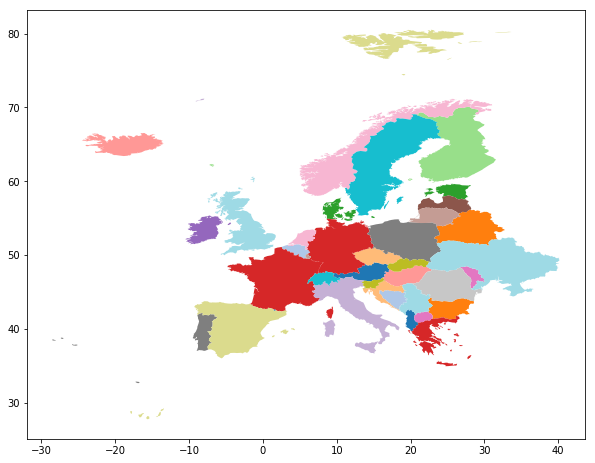

In [37]:
europa.plot(figsize=(10,10),column='NAME',cmap='tab20');

In [39]:
europatxt=pd.read_csv('Europa.csv')
europatxt.head()

,zoom,name,abbreviation,ISO alpha 2,ISO alpha 3,ISO numeric,land area km,population,latitude,longitude,continent
0,3,Ukraine,Ukr.,UA,UKR,804,603700.0,45415596,49.0,32.0,eu
1,3,France,Fr.,FR,FRA,250,547030.0,64768389,46.0,2.0,eu
2,3,Spain,Spain,ES,ESP,724,504782.0,46505963,40.0,-4.0,eu
3,3,Sweden,Swe.,SE,SWE,752,449964.0,9045000,62.0,15.0,eu
4,3,Germany,Ger.,DE,DEU,276,357021.0,82369000,51.5,10.5,eu


In [41]:
europ2=europa.set_index('NAME').join(europatxt.set_index('name'))

In [44]:
europ2.head()

,OBJECTID,GMI_CNTRY,REGION,Shape_Leng,Shape_Area,geometry,zoom,abbreviation,ISO alpha 2,ISO alpha 3,ISO numeric,land area km,population,latitude,longitude,continent
NAME,,,,,,,,,,,,,,,,
Albania,2,ALB,Europe,10.047658,3.084494,"POLYGON ((19.39731979370129 42.31707000732433,...",4.0,Alb.,AL,ALB,8.0,28748.0,2986952.0,41.00,20.00,eu
Andorra,4,AND,Europe,0.916993,0.051535,"POLYGON ((1.710966944694633 42.47349929809576,...",4.0,And.,AD,AND,20.0,468.0,84000.0,42.50,1.50,eu
Austria,11,AUT,Europe,23.129493,10.068794,"POLYGON ((16.88660049438482 48.73031997680664,...",4.0,Aus.,AT,AUT,40.0,83858.0,8205000.0,47.33,13.33,eu
Belgium,17,BEL,Europe,12.272031,3.903924,"POLYGON ((3.370645999908504 51.37554931640631,...",4.0,Bel.,BE,BEL,56.0,30510.0,10403000.0,50.83,4.00,eu
Bosnia and Herzegovina,23,BIH,Europe,14.211078,5.793655,"POLYGON ((17.57955551147467 42.94400787353527,...",4.0,Bos.,BA,BIH,70.0,51129.0,4590000.0,44.25,17.83,eu


In [51]:
europ2.columns

Index(['OBJECTID', 'GMI_CNTRY', 'REGION', 'Shape_Leng', 'Shape_Area',
       'geometry', 'zoom', 'abbreviation', 'ISO alpha 2', 'ISO alpha 3',
       'ISO numeric', 'land area km', 'population', 'latitude', 'longitude',
       'continent'],
      dtype='object')

In [55]:
# obliczymy gęstość zaludnienia

europ2['GEST']=europ2.population/europ2['land area km']

In [65]:
europ2B=europ2.dropna()

In [110]:
europ2B['GEST'].describe()

count       38.000000
mean       561.861104
std       2654.603245
min          2.999126
25%         76.278483
50%        105.320486
75%        182.574628
max      16482.500000
Name: GEST, dtype: float64

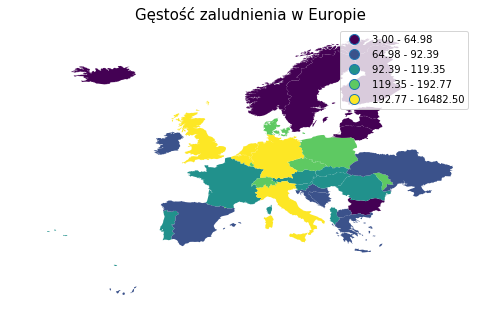

In [174]:


fig, ax = plt.subplots(1, figsize=(8, 10))

europ2B.plot(column='GEST',cmap='viridis', scheme='quantiles',ax=ax,legend='True');

sc=plt.title('Gęstość zaludnienia w Europie',fontdict={'fontsize':'15','fontweight':'2'})
ax.axis('off');




In [142]:
fig.savefig("mapa1.png",dpi=300)

### Tworzenie warstw

In [143]:
df = pd.DataFrame(
    {'City': ['Buenos Aires', 'Brasilia', 'Santiago', 'Bogota', 'Caracas'],
     'Country': ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Venezuela'],
     'Latitude': [-34.58, -15.78, -33.45, 4.60, 10.48],
     'Longitude': [-58.66, -47.91, -70.66, -74.08, -66.86]})

In [144]:
df.head()

,City,Country,Latitude,Longitude
0,Buenos Aires,Argentina,-34.58,-58.66
1,Brasilia,Brazil,-15.78,-47.91
2,Santiago,Chile,-33.45,-70.66
3,Bogota,Colombia,4.60,-74.08
4,Caracas,Venezuela,10.48,-66.86


In [145]:
df['Coordinates'] = list(zip(df.Longitude, df.Latitude))

In [147]:
df['Coordinates'] = df['Coordinates'].apply(Point)

In [148]:
gdf = geopandas.GeoDataFrame(df, geometry='Coordinates')


In [149]:
gdf.head()

,City,Country,Latitude,Longitude,Coordinates
0,Buenos Aires,Argentina,-34.58,-58.66,POINT (-58.66 -34.58)
1,Brasilia,Brazil,-15.78,-47.91,POINT (-47.91 -15.78)
2,Santiago,Chile,-33.45,-70.66,POINT (-70.66 -33.45)
3,Bogota,Colombia,4.60,-74.08,POINT (-74.08 4.6)
4,Caracas,Venezuela,10.48,-66.86,POINT (-66.86 10.48)


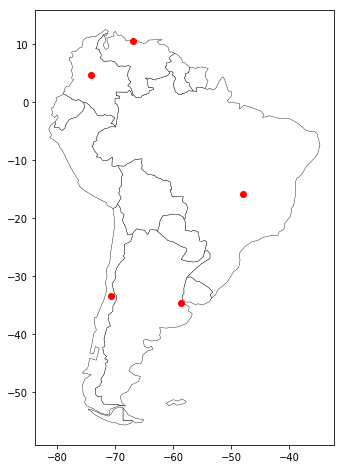

In [163]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
ax = world[world.continent == 'South America'].plot(color='white', edgecolor='black',
                                                    figsize=(8, 8),linewidth=0.4)

# We can now plot our GeoDataFrame.

gdf.plot(ax=ax, color='red',figsize=(8,8));



In [160]:
world.head()


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...


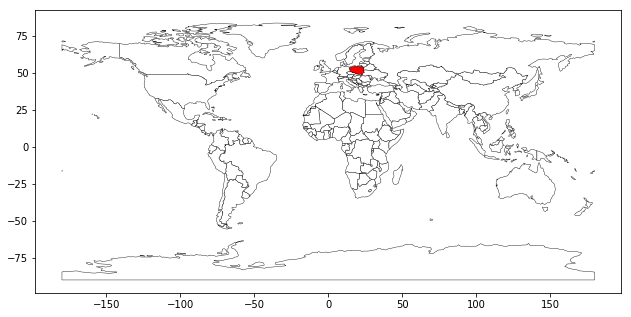

In [164]:
plt.rcParams['figure.figsize'] = [10.5, 8]  # inny sposob określania wielkości

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
ax = world.plot(
    color='white', edgecolor='black',linewidth=0.4)
world[world.name == 'Poland'].plot(ax=ax,
    color='red', edgecolor='black',linewidth=0.4)


plt.show()

In [13]:
geopandas.datasets.available


['naturalearth_cities', 'naturalearth_lowres', 'nybb']

### Zadanie

1. Utworzyć mapę punktów pomiarowych zanieczyszczenia powietrza: wykorzystać pliki SHP: pl_powiaty.shp i stacje_PM10.shp.
2. Utworzyć mapę średniego rocznego zanieczyszczenia powietrza (pole mean).

In [176]:
powiatypl=gpd.read_file('pl_powiaty.shp')

In [177]:
powiatypl.head()

,ObjectID,PROV2NAME,POW,geometry
0,1,Goleniow,1622.710,(POLYGON ((228398.9456293294 668790.8805178124...
1,2,Gryfice,1498.330,"POLYGON ((271941.3676817873 657036.2752879597,..."
2,3,Gryfino,1853.360,"POLYGON ((214852.195950307 582592.3903765604, ..."
3,4,Kamien Pomorski,876.285,(POLYGON ((232040.3831212763 694083.8793246709...
4,5,Police,549.658,(POLYGON ((189777.6468758993 663786.9283639491...


In [183]:
pm10=gpd.read_file('stacje_PM10.shp')

In [184]:
pm10.head()

,AirQuality,AirQuali_1,AirQuali_2,AirPolluta,Altitude,count,mean,STACJA_MET,IDPP,geometry
0,SlKatoKossut,PL0008A,urban,PM10,273.0,20654.0,41.369689,Katowice,1,POINT (498220.7060315014 266381.2517729597)
1,MpKrakAlKras,PL0012A,urban,PM10,207.0,20567.0,57.291317,KrakÃ³w,2,POINT (566277.409905806 243790.1838724455)
2,WpKoniWyszyn,PL0031A,urban,PM10,103.0,18830.0,28.220928,Kalisz,3,POINT (450086.9278154476 484649.3748249114)
3,MpKrakBulwar,PL0039A,urban,PM10,195.0,20730.0,43.918007,KrakÃ³w,4,POINT (575368.7250196906 245203.5194373727)
4,PmGdaPoWie01,PL0045A,urban,PM10,51.0,20291.0,24.810398,Gdynia,5,POINT (476303.0416619111 721088.8726625945)


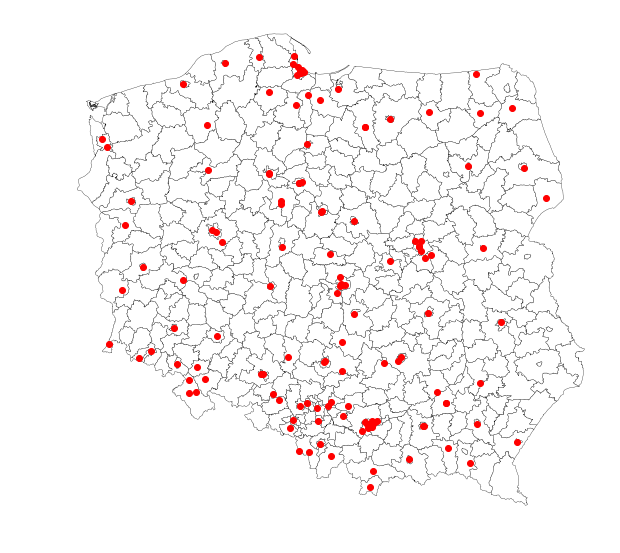

In [186]:
plt.rcParams['figure.figsize'] = [10,10]
ax = powiatypl.plot(color='white', edgecolor='black',linewidth=0.3);
pm10.plot(ax=ax, color='red')
ax.axis('off');

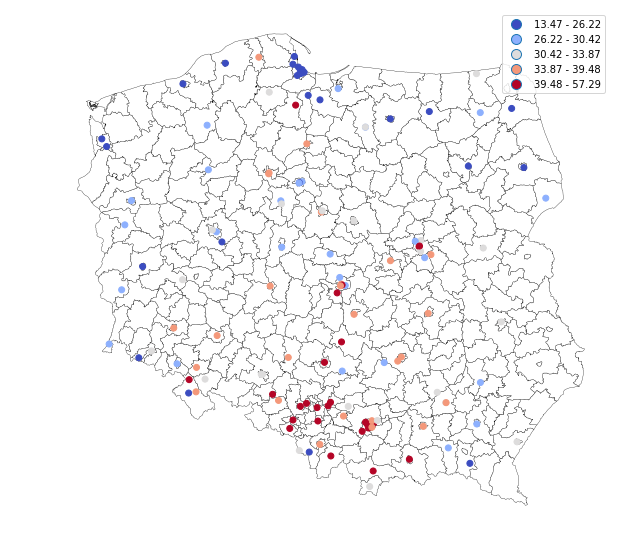

In [188]:
ax = powiatypl.plot(color='white', edgecolor='black',linewidth=0.3);
pm10.plot(column='mean',cmap='coolwarm', scheme='quantiles',ax=ax,legend='True');
ax.axis('off');